In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O data-week-3.csv 

--2023-10-10 21:03:40--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data-week-3.csv'

     0K .......... .......... .......... .......... ..........  3% 3.84M 0s
    50K .......... .......... .......... .......... ..........  6%  119M 0s
   100K .......... .......... .......... .......... .......... 10% 16.9M 0s
   150K .......... .......... .......... .......... .......... 13% 3.97M 0s
   200K .......... .......... .......... .......... .......... 17%  102M 0s
   250K .......... .......... .......... .......... .......... 20% 5.16M 0s
   300K .......... .......... .......... .......... .......... 

In [93]:
df = pd.read_csv('data-week-3.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [94]:
df = df[['Make', 'Model','Year','Engine HP','Engine Cylinders', 'Transmission Type','Vehicle Style',
       'highway MPG','city mpg','MSRP']]


In [104]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_avg            0
dtype: int64

In [96]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [97]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

In [98]:
df.rename(columns = {'msrp':'price'}, inplace = True)

In [151]:
numerical = ['year', 'engine_hp', 'engine_cylinders','highway_mpg',
'city_mpg']

In [152]:
categorical = ['make','model','transmission_type','vehicle_style']

In [134]:
avg = df['price'].mean()

In [135]:
df['above_avg'] = df['price'].apply(lambda x: 1 if x > avg else 0)


In [45]:
df_val.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_avg            0
dtype: int64

In [34]:
y_train.isnull().values.any()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [136]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [137]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [140]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_avg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0
...,...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,20995,0
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,35850,0
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,20265,0
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,2000,0


In [139]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [108]:
y_train = df_train.above_avg.values
y_val = df_val.above_avg.values
y_test = df_test.above_avg.values

del df_train['above_avg']
del df_val['above_avg']
del df_test['above_avg']

In [141]:
print(df_train.isnull().sum())

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_avg            0
dtype: int64


In [89]:
categorical.dtypes

make                 object
model                object
transmission_type    object
vehicle_style        object
dtype: object

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#@ CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.688
engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


In [153]:
columns = categorical + numerical

In [154]:
columns

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [155]:
columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [156]:
roc_auc_score(y_val, y_pred)

0.9790257223864177

In [157]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


#@ IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,332,10,1397
20,0.2,623,201,31,1528
30,0.3,606,143,48,1586
40,0.4,590,106,64,1623
50,0.5,569,75,85,1654
60,0.6,550,51,104,1678
70,0.7,506,30,148,1699
80,0.8,464,21,190,1708
90,0.9,376,3,278,1726


In [158]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

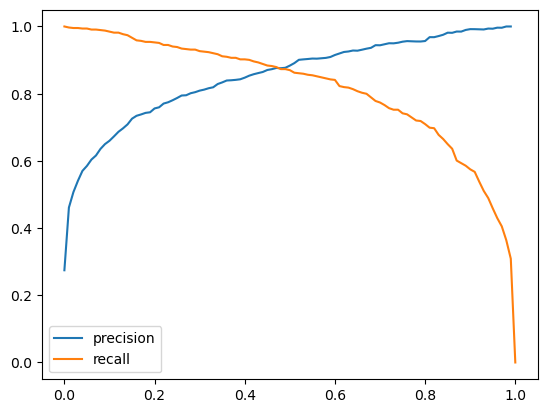

In [159]:

#@ INSPECTING THE CURVES:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

In [160]:
#@ GETTING F1 SCORES:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

In [165]:
pd.set_option('display.max_rows', None)

In [166]:
df_scores

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688
1,0.01,652,762,2,967,0.461103,0.996942,0.630561
2,0.02,651,633,3,1096,0.507009,0.995413,0.671827
3,0.03,651,553,3,1176,0.540698,0.995413,0.700753
4,0.04,650,490,4,1239,0.570175,0.993884,0.724638
5,0.05,650,461,4,1268,0.585059,0.993884,0.736544
6,0.06,648,425,6,1304,0.603914,0.990826,0.750434
7,0.07,648,404,6,1325,0.615970,0.990826,0.759672
8,0.08,647,371,7,1358,0.635560,0.989297,0.773923
9,0.09,646,348,8,1381,0.649899,0.987768,0.783981


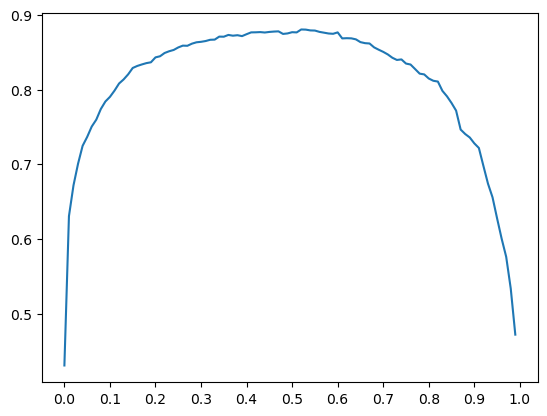

In [161]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [167]:

#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [171]:
from sklearn.model_selection import KFold

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_avg
    y_val = df_val.above_avg

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


In [172]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_avg
        y_val = df_val.above_avg

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
     

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.002
C=   1, 0.981 +- 0.003
C=  10, 0.984 +- 0.003
